In [1]:
import gensim.downloader 

wv = gensim.downloader.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [2]:
words = ['barrels', 'ecuador','venezuela','poland', 'energy', 'industry', 'kuwait', 'oil', 'petroleum', 'iraq']

In [3]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

def plot_words(words):
  svd = TruncatedSVD(n_components=2)
  d_words = svd.fit_transform(wv[words])
  xs, ys = [], []
  for xy in d_words:
    [x,y] = xy
    xs.append(x)
    ys.append(y)
  fig, ax = plt.subplots()
  ax.scatter(xs, ys)

  for i, word in enumerate(words):
      ax.annotate(word, (xs[i], ys[i]))

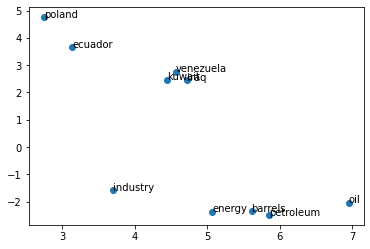

In [4]:
plot_words(words)

### Polysynemous words

In [5]:
wv.most_similar("record") #git

[('records', 0.7163501381874084),
 ('recorded', 0.6425708532333374),
 ('previous', 0.6336771249771118),
 ('year', 0.5889142155647278),
 ('recording', 0.5879488587379456),
 ('last', 0.5812119245529175),
 ('winning', 0.5789461135864258),
 ('best', 0.57738196849823),
 ('career', 0.5759952664375305),
 ('time', 0.5627326965332031)]

In [6]:
wv.most_similar("shell") # firma i łuski

[('shells', 0.6614183783531189),
 ('mortar', 0.5519026517868042),
 ('oil', 0.5103628635406494),
 ('casing', 0.5095691084861755),
 ('chevron', 0.5001953840255737),
 ('bp', 0.49561449885368347),
 ('casings', 0.48896804451942444),
 ('exxonmobil', 0.4825778901576996),
 ('gas', 0.47775182127952576),
 ('mobil', 0.4607611298561096)]

In [7]:
wv.most_similar("python") # 3 znaczenia

[('monty', 0.6892720460891724),
 ('spamalot', 0.5611782073974609),
 ('cleese', 0.5454379916191101),
 ('php', 0.5255268216133118),
 ('pythons', 0.5076838731765747),
 ('perl', 0.4999809265136719),
 ('scripting', 0.4851018786430359),
 ('skit', 0.47538265585899353),
 ('reticulatus', 0.4709733724594116),
 ('crocodile', 0.4570692777633667)]

TODO: find one more

In [14]:
wv.most_similar("reserve")

[('reserves', 0.6434080004692078),
 ('fed', 0.6379982233047485),
 ('interest', 0.5360831022262573),
 ('central', 0.5168545246124268),
 ('greenspan', 0.5144596099853516),
 ('guard', 0.5031501054763794),
 ('policymakers', 0.5028124451637268),
 ('bernanke', 0.5010292530059814),
 ('federal', 0.4990732669830322),
 ('corps', 0.48220789432525635)]

Mamy tutaj kolejny przykład słowa, które, w zależności od kontekstu, ma wiele znaczeń. Jednym z nich jest po prostu czasownik "rezerwować". Drugim znaczeniem jest rezerwa (na przykład federalna, rezerwa surowców). Kolejne znaczenie słowa "rezerwa" jest w kontekście militarnym - "rezerwa" jako jednostka wojskowa.

## Analogies

Good analogies

In [15]:
wv.most_similar(positive=['warsaw', 'italy'], negative=['poland'])

[('rome', 0.7152276039123535),
 ('italian', 0.6521812081336975),
 ('milan', 0.6067098379135132),
 ('turin', 0.5554434657096863),
 ('paris', 0.5553934574127197),
 ('bologna', 0.5539686679840088),
 ('naples', 0.5481479167938232),
 ('prohertrib', 0.5451392531394958),
 ('brussels', 0.5315011739730835),
 ('vienna', 0.522147536277771)]

In [16]:
wv.most_similar(positive=['bigger', 'small'], negative=['big'])

[('smaller', 0.8234847187995911),
 ('larger', 0.8212383389472961),
 ('large', 0.6658588647842407),
 ('tiny', 0.6530793905258179),
 ('size', 0.6375784277915955),
 ('sized', 0.6072860956192017),
 ('smallest', 0.5710717439651489),
 ('relatively', 0.5185189247131348),
 ('than', 0.5131736993789673),
 ('greater', 0.5110926032066345)]

In [17]:
wv.most_similar(positive=['cu', 'zinc'], negative=['copper'])

[('seeme', 0.5480884313583374),
 ('zn', 0.521807849407196),
 ('phe', 0.4421136975288391),
 ('μg', 0.42606794834136963),
 ('hs', 0.41812530159950256),
 ('omul', 0.41018256545066833),
 ('mg/l', 0.4097822606563568),
 ('ei', 0.39971697330474854),
 ('h2o', 0.3982445299625397),
 ('bcm', 0.3911949694156647)]

In [18]:
wv.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998854637146),
 ('elizabeth', 0.546359658241272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164472460746765)]

In [19]:
wv.most_similar(positive=["hitler", 'russia'], negative=['germany'])

[('stalin', 0.6491348743438721),
 ('putin', 0.5700370669364929),
 ('soviet', 0.5667716264724731),
 ('yeltsin', 0.5527988076210022),
 ('russian', 0.5486958026885986),
 ('kremlin', 0.5368818640708923),
 ('lebed', 0.5129358172416687),
 ('moscow', 0.5090124607086182),
 ('khrushchev', 0.508275032043457),
 ('lenin', 0.5056862831115723)]

In [20]:
wv.most_similar(positive=["sushi", 'spain'], negative=['japan'])

[('tapas', 0.5149334073066711),
 ('paella', 0.5005897283554077),
 ('flamenco', 0.4588620662689209),
 ('salsa', 0.45332974195480347),
 ('omelet', 0.4437166750431061),
 ('feliciano', 0.43677711486816406),
 ('chorizo', 0.42818450927734375),
 ('appetizers', 0.42781874537467957),
 ('verdasco', 0.42165130376815796),
 ('madrid', 0.4196069836616516)]

In [21]:
wv.most_similar(positive=["einstein", 'painter'], negative=['scientist'])

[('picasso', 0.5602502822875977),
 ('expressionist', 0.5363213419914246),
 ('monet', 0.5350351333618164),
 ('painters', 0.5283687114715576),
 ('painting', 0.5260388851165771),
 ('matisse', 0.5256484746932983),
 ('surrealist', 0.5232280492782593),
 ('cubist', 0.5000053644180298),
 ('rembrandt', 0.49524158239364624),
 ('paintings', 0.4932195246219635)]

In [22]:
wv.most_similar(positive=["congressman", 'woman'], negative=['man'])

[('congresswoman', 0.7333186268806458),
 ('senator', 0.6340636014938354),
 ('rep.', 0.628604531288147),
 ('democrat', 0.6067011952400208),
 ('lawmaker', 0.5581487417221069),
 ('congressmen', 0.5471855401992798),
 ('republican', 0.5448379516601562),
 ('congressional', 0.5439686179161072),
 ('representative', 0.5205968618392944),
 ('sen.', 0.5118258595466614)]

Biases in analogies

In [23]:
wv.most_similar(positive=['manager', 'woman'], negative=['man'])

[('assistant', 0.5620709657669067),
 ('managers', 0.5032733082771301),
 ('director', 0.49716031551361084),
 ('employee', 0.494746595621109),
 ('management', 0.48427969217300415),
 ('managing', 0.48158785700798035),
 ('spokeswoman', 0.4637411832809448),
 ('owner', 0.4630720913410187),
 ('consultant', 0.4613330066204071),
 ('wife', 0.4598345160484314)]

In [24]:
wv.most_similar(positive=['stewardess', 'man'], negative=['woman'])

[('hijacker', 0.4259912967681885),
 ('tans', 0.40667155385017395),
 ('airline', 0.3986058831214905),
 ('stewardesses', 0.3963492512702942),
 ('pal', 0.3889896869659424),
 ('unshaven', 0.3831104040145874),
 ('attendant', 0.37830811738967896),
 ('fireman', 0.37551939487457275),
 ('hijacks', 0.37500399351119995),
 ('chubby', 0.37313079833984375)]

TODO: find one more good analogy and bias in analogy

Good analogy:

In [55]:
wv.most_similar(positive=["hollywood", 'india'], negative=['usa'])

[('bollywood', 0.5845800638198853),
 ('indian', 0.5523296594619751),
 ('movie', 0.5267189741134644),
 ('delhi', 0.487975150346756),
 ('film', 0.4846310019493103),
 ('hindu', 0.46057239174842834),
 ('films', 0.45953869819641113),
 ('kashmir', 0.45260557532310486),
 ('movies', 0.45009860396385193),
 ('decades', 0.448822945356369)]

Bias in analogy:

In [49]:
wv.most_similar(positive=["hairdresser", 'man'], negative=['woman'])

[('bricklayer', 0.5133412480354309),
 ('bartender', 0.49326297640800476),
 ('mechanic', 0.4863339066505432),
 ('salesman', 0.47580069303512573),
 ('plumber', 0.47571295499801636),
 ('electrician', 0.4683968722820282),
 ('apprentice', 0.4682706594467163),
 ('blacksmith', 0.4639042317867279),
 ('newsagent', 0.4476345181465149),
 ('welder', 0.44019538164138794)]

# Synonyms and antonims

Good ones

In [56]:
print(wv.distance("fire", "water"))
print(wv.distance("liquid", "water"))

0.5467787683010101
0.4450404644012451


In [57]:
print(wv.distance("smile", "laugh"))
print(wv.distance("smile", "cry"))

0.33661413192749023
0.6078213751316071


Wrong ones

In [58]:
print(wv.distance("black", "dark"))
print(wv.distance("black", "white"))

0.3460924029350281
0.20702677965164185


TODO: Find one more good and one more bad 

Good:

In [75]:
print(wv.distance("usa", "washington"))
print(wv.distance("usa", "pekin"))

0.6448318958282471
1.0974096432328224


Bad:

In [95]:
print(wv.distance("small", "big"))
print(wv.distance("small", "low"))

0.3511464595794678
0.5087694227695465
